# Procesy Poissona z losowymi parametrami

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [6]:
def procesPoissona(lam,T):
    """Funkcja generująca czasy oczekiwania na skok w procesie Poissona
    lam - intensywnosc procesu
    T - czas trwania procesu
    ---------------------------
    S - momenty skoków
    """
    I = 0
    t = 0
    S = [0]
    while t <= T:
        u = random.random()
        t -= math.log(u)/lam
        I += 1
        S.append(t)
    return S

In [7]:
def procesPoissona2(lam, T):
    n = np.random.poisson(lam*T)
    if n == 0:
        return None
    U = np.random.uniform(0,T,n)
    U.sort()
    return U

In [15]:
def generujProcesPoissonaLosowaLambda(prFunction, params, T):
    """ prFunction - funkcja prawdopodobienstwa, z ktorej generujemy lambde
        params - prametry rozkladu
        T - czas procesu
        """
    lam = prFunction(*params)
    return procesPoissona(lam, T)    

In [23]:
T = 100

In [66]:
MPP = [generujProcesPoissonaLosowaLambda(random.expovariate, (2,), T) for _ in range(200)]
daneHistogramT2 = [len([el for el in proces if el < T/2]) for proces in MPP] #ilosc skokow w procesie Poissona do czasu T/2
daneHistogramT = [len(proces) for proces in MPP] #ilosc skokow w procesie Poissona do czasu T

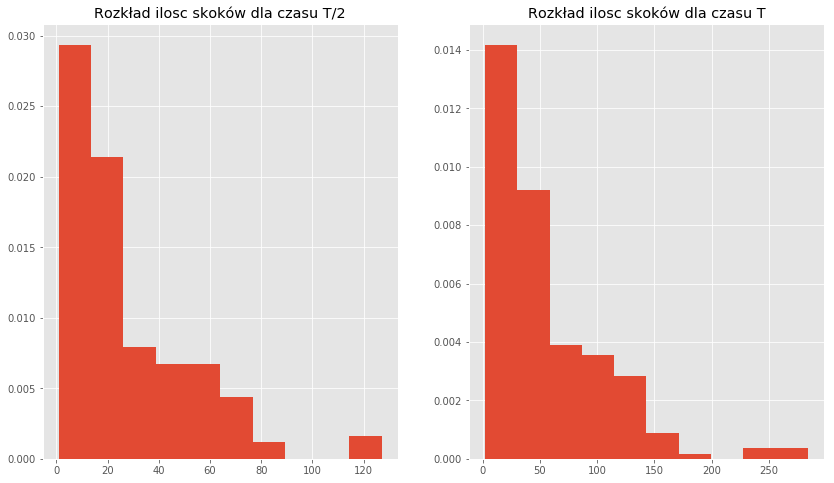

In [71]:
plt.figure(figsize = (14, 8))

plt.subplot(1,2,1)
plt.title('Rozkład ilosc skoków dla czasu T/2')
plt.hist(daneHistogramT2, density = True)

plt.subplot(1,2,2)
plt.title('Rozkład ilosc skoków dla czasu T')
plt.hist(daneHistogramT, density = True)

plt.show()

Można zauważyć, że rozkład ilości skoków do czasu T oraz czasu T/2 przypomina rozkład zmiennej, z której losowana jest lambda.

In [65]:
def generujProcesPoissonaLosowaLambdaLosoweT(prFunction, params, T):
    """ prFunction - funkcja prawdopodobienstwa, z ktorej generujemy lambde
        params - prametry rozkladu
        T - max czas procesu
        """
    lam = prFunction(*params)
    T = random.uniform(0,T)
    return procesPoissona(lam, T)   

In [70]:
realizacje = [generujProcesPoissonaLosowaLambdaLosoweT(random.expovariate, (1,), 100) for _ in range(300)]
rozkladIloscSkokow = [len(proces) for proces in realizacje]

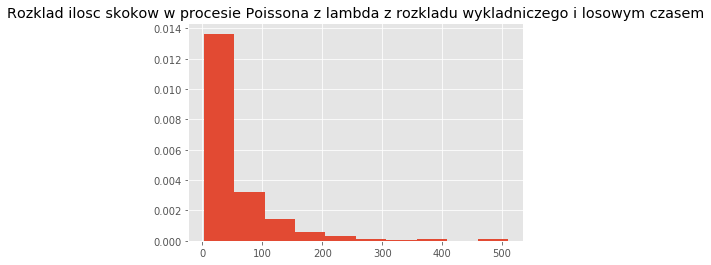

In [74]:
plt.title('Rozklad ilosc skokow w procesie Poissona z lambda z rozkladu wykladniczego i losowym czasem')
plt.hist(rozkladIloscSkokow, density = True)
plt.show()

# Ruch Browna

In [3]:
def generujRuchBrowna(T,r):
    ilosc_krokow = math.ceil(T/r)
    B = [0]
    for _ in range(ilosc_krokow):
        B.append(B[-1] + math.sqrt(r)*random.gauss(0,1))
    return B

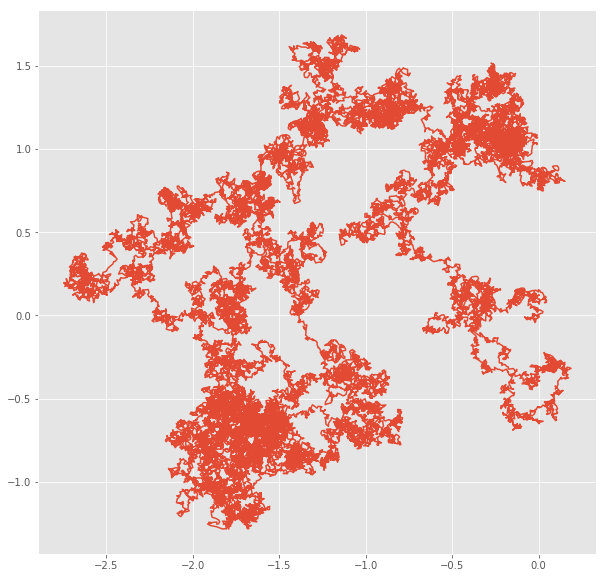

In [14]:
plt.figure(figsize=(10,10))

A = generujRuchBrowna(4,10**(-4))
B = generujRuchBrowna(4,10**(-4))
plt.plot(A,B)
plt.show()